# Compare nf-pipeline generated outputs and compare to count tables provided via GEO

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1 Dataset Wolfram-Schauerte_2022 --> single-end

In [54]:
dfNF = pd.read_csv('Wolfram-Schauerte_2022/countData_from_pipeline.tsv', sep = '\t', comment='#', index_col=0)
dfREF = pd.read_csv('Wolfram-Schauerte_2022/GSE211026_TPMs_allSamples.txt', sep = '\t', index_col=0)
metadata = pd.read_csv('Wolfram-Schauerte_2022/GSE211026_SraRunTable.txt')

In [55]:
dfNF

,Chr,Start,End,Strand,Length,SRR21013144_sorted.bam,SRR21013136_sorted.bam,SRR21013148_sorted.bam,SRR21013141_sorted.bam,SRR21013142_sorted.bam,SRR21013137_sorted.bam,SRR21013139_sorted.bam,SRR21013145_sorted.bam,SRR21013143_sorted.bam,SRR21013149_sorted.bam,SRR21013146_sorted.bam,SRR21013138_sorted.bam,SRR21013140_sorted.bam,SRR21013150_sorted.bam,SRR21013147_sorted.bam
Geneid,,,,,,,,,,,,,,,,,,,,
gene-b0001,U00096.3,190,255,+,66,246,32,1080,77,775,202,194,3108,819,2220,1162,118,421,3032,5370
gene-b0002,U00096.3,337,2799,+,2463,2946,203,3660,401,1755,355,768,3004,1146,6654,2719,321,845,9174,5395
gene-b0003,U00096.3,2801,3733,+,933,1604,91,2926,291,1407,232,586,2375,701,4226,2598,228,587,7527,5175
gene-b0004,U00096.3,3734,5020,+,1287,1913,151,4328,549,2274,337,946,3757,1293,7866,3568,361,1000,11956,7862
gene-b0005,U00096.3,5234,5530,+,297,462,33,768,102,480,72,177,876,343,1497,1043,56,268,1889,1739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gene-T4p274,NC_000866.4,166815,166913,-,99,41719,2432,18,30376,76886,8136,44187,10309,71639,0,10505,5469,60641,0,10101
gene-T4p275,NC_000866.4,166910,166996,-,87,21951,1850,16,14184,41600,6019,23560,7302,41006,0,6475,3886,31991,0,6825
gene-T4p276,NC_000866.4,167103,167660,-,558,4235,22771,33,38105,1146,86034,34073,46,5320,2,66,64698,92541,1,141


In [56]:
dfREF

,Chr,T0_R1,T0_R2,T0_R3,T1_R1,T1_R2,T1_R3,T4_R1,T4_R2,T4_R3,T7_R1,T7_R2,T7_R3,T20_R1,T20_R2,T20_R3
Geneid,,,,,,,,,,,,,,,,
gene-b0001,U00096.3,788.315158,530.680369,599.436254,985.875651,302.887114,1100.230793,106.889437,197.748249,181.003253,28.586534,66.974057,49.875959,27.351794,48.785638,14.098508
gene-b0002,U00096.3,61.809307,41.174339,53.401448,25.610289,18.743231,27.606676,33.853198,7.268402,11.470475,3.902083,3.690760,5.725031,2.162699,2.279827,2.952945
gene-b0003,U00096.3,121.978413,61.470714,102.579455,59.437613,43.151255,51.531635,44.534705,10.544269,22.338443,6.690899,6.045100,10.542481,3.612362,3.692928,3.032673
gene-b0004,U00096.3,154.062970,92.975697,119.434189,71.447511,46.751876,65.033738,41.310753,15.017065,28.794801,10.320865,8.299828,13.384241,4.650185,4.201182,4.175696
gene-b0005,U00096.3,110.720167,80.503221,96.500699,71.995039,62.519998,69.999849,45.284183,18.016552,27.480221,8.740104,10.228481,11.348228,3.263651,4.003374,4.028145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gene-T4p274,NC_000866.4,0.088789,0.081125,1.342952,337.700486,551.770043,650.067686,5223.582356,4152.942893,4674.465954,3814.735485,2466.628405,3234.840545,348.611870,480.492515,327.814291
gene-T4p275,NC_000866.4,0.101036,0.092315,1.528187,108.701817,59.280457,257.674986,203.142805,713.141848,748.969739,538.374213,628.589261,443.765119,258.092778,387.954425,265.202760
gene-T4p276,NC_000866.4,0.047259,0.071966,2.212467,3.153400,2.080806,1.994814,221.604482,155.251379,34.244871,1715.041452,1837.357303,1145.328434,1938.019301,2498.030279,1487.434372


In [57]:
metadata

,Run,Assay Type,AvgSpotLen,bacteriophage,Bases,BioProject,BioSample,Bytes,Center Name,Consent,...,Platform,ReleaseDate,create_date,version,Sample Name,source_name,SRA Study,strain,time,treatment
0,SRR21013136,RNA-Seq,85,"Escherichia phage T4 (DSMZ, Braunschweig, Germ...",1804280125,PRJNA868713,SAMN30261892,753692490,MAX-PLANCK-INSTITUTE FOR TERRESTRIAL MICROBIOLOGY,public,...,ILLUMINA,2022-11-09T00:00:00Z,2022-08-11T11:52:00Z,1,GSM6447628,Escherichia coli (Migula 1895) Castellani and ...,SRP391066,Escherichia coli (Migula 1895) Castellani and ...,20 min,infected with T4 phage
1,SRR21013137,RNA-Seq,85,"Escherichia phage T4 (DSMZ, Braunschweig, Germ...",3703168565,PRJNA868713,SAMN30261893,1540473729,MAX-PLANCK-INSTITUTE FOR TERRESTRIAL MICROBIOLOGY,public,...,ILLUMINA,2022-11-09T00:00:00Z,2022-08-11T11:55:00Z,1,GSM6447627,Escherichia coli (Migula 1895) Castellani and ...,SRP391066,Escherichia coli (Migula 1895) Castellani and ...,20 min,infected with T4 phage
2,SRR21013138,RNA-Seq,85,"Escherichia phage T4 (DSMZ, Braunschweig, Germ...",3428771990,PRJNA868713,SAMN30261894,1422718208,MAX-PLANCK-INSTITUTE FOR TERRESTRIAL MICROBIOLOGY,public,...,ILLUMINA,2022-11-09T00:00:00Z,2022-08-11T11:56:00Z,1,GSM6447626,Escherichia coli (Migula 1895) Castellani and ...,SRP391066,Escherichia coli (Migula 1895) Castellani and ...,20 min,infected with T4 phage
3,SRR21013139,RNA-Seq,85,"Escherichia phage T4 (DSMZ, Braunschweig, Germ...",2948359045,PRJNA868713,SAMN30261895,1232269474,MAX-PLANCK-INSTITUTE FOR TERRESTRIAL MICROBIOLOGY,public,...,ILLUMINA,2022-11-09T00:00:00Z,2022-08-11T11:55:00Z,1,GSM6447625,Escherichia coli (Migula 1895) Castellani and ...,SRP391066,Escherichia coli (Migula 1895) Castellani and ...,7 min,infected with T4 phage
4,SRR21013140,RNA-Seq,85,"Escherichia phage T4 (DSMZ, Braunschweig, Germ...",4865479730,PRJNA868713,SAMN30261896,2019688615,MAX-PLANCK-INSTITUTE FOR TERRESTRIAL MICROBIOLOGY,public,...,ILLUMINA,2022-11-09T00:00:00Z,2022-08-11T12:03:00Z,1,GSM6447624,Escherichia coli (Migula 1895) Castellani and ...,SRP391066,Escherichia coli (Migula 1895) Castellani and ...,7 min,infected with T4 phage
5,SRR21013141,RNA-Seq,85,"Escherichia phage T4 (DSMZ, Braunschweig, Germ...",2058246865,PRJNA868713,SAMN30261897,853831491,MAX-PLANCK-INSTITUTE FOR TERRESTRIAL MICROBIOLOGY,public,...,ILLUMINA,2022-11-09T00:00:00Z,2022-08-11T11:56:00Z,1,GSM6447623,Escherichia coli (Migula 1895) Castellani and ...,SRP391066,Escherichia coli (Migula 1895) Castellani and ...,7 min,infected with T4 phage
6,SRR21013142,RNA-Seq,85,"Escherichia phage T4 (DSMZ, Braunschweig, Germ...",3248296930,PRJNA868713,SAMN30261898,1362038328,MAX-PLANCK-INSTITUTE FOR TERRESTRIAL MICROBIOLOGY,public,...,ILLUMINA,2022-11-09T00:00:00Z,2022-08-11T11:57:00Z,1,GSM6447622,Escherichia coli (Migula 1895) Castellani and ...,SRP391066,Escherichia coli (Migula 1895) Castellani and ...,4 min,infected with T4 phage
7,SRR21013143,RNA-Seq,85,"Escherichia phage T4 (DSMZ, Braunschweig, Germ...",3228459290,PRJNA868713,SAMN30261899,1347966541,MAX-PLANCK-INSTITUTE FOR TERRESTRIAL MICROBIOLOGY,public,...,ILLUMINA,2022-11-09T00:00:00Z,2022-08-11T11:56:00Z,1,GSM6447621,Escherichia coli (Migula 1895) Castellani and ...,SRP391066,Escherichia coli (Migula 1895) Castellani and ...,4 min,infected with T4 phage
8,SRR21013144,RNA-Seq,85,"Escherichia phage T4 (DSMZ, Braunschweig, Germ...",1874782780,PRJNA868713,SAMN30261900,784101721,MAX-PLANCK-INSTITUTE FOR TERRESTRIAL MICROBIOLOGY,public,...,ILLUMINA,2022-11-09T00:00:00Z,2022-08-11T11:51:00Z,1,GSM6447620,Escherichia coli (Migula 1895) Castellani and ...,SRP391066,Escherichia coli (Migula 1895) Castellani and ...,4 min,infected with T4 phage
9,SRR21013145,RNA-Seq,85,"Escherichia phage T4 (DSMZ, Braunschweig, Germ...",2713069695,PRJNA868713,SAMN30261901,1149361534,MAX-PLANCK-INSTITUTE FOR TERRESTRIAL MICROBIOLOGY,public,...,ILLUMINA,2022-11-09T00:00:00Z,2022-08-11T11:55:00Z,1,GSM6447619,Escherichia coli (Migula 1895) Castellani and ...,SRP391066,Esch

#### Format the datasets

Issue now is that the metadata does not properly annotated sample names. Thus, this will be done manually by adding another sample name column to the metadata.

In [58]:
# Match GSM IDs and SampleNames

sampleDict = {'GSM6447614': 'T0_R1', 'GSM6447615': 'T0_R2', 'GSM6447616': 'T0_R3', 'GSM6447617': 'T1_R1', 'GSM6447618': 'T1_R2', 'GSM6447619': 'T1_R3',
              'GSM6447620': 'T4_R1', 'GSM6447621': 'T4_R2', 'GSM6447622': 'T4_R3', 'GSM6447623': 'T7_R1', 'GSM6447624': 'T7_R2', 'GSM6447625': 'T7_R3',
              'GSM6447626': 'T20_R1', 'GSM6447627': 'T20_R2', 'GSM6447628': 'T20_R3'}

# Define function

def annotateData(df, sampleDict):
    dfOut = df.copy()

    dfOut['SampleID'] = dfOut['Run'].astype(str) + '_sorted.bam'

    dfOut.index = dfOut['Sample Name']

    dfOut['SampleNames'] = pd.Series(sampleDict)
    dfOut.index = dfOut['SampleID']

    return dfOut

In [59]:
metadataFull = annotateData(metadata, sampleDict)
metadataFull

,Run,Assay Type,AvgSpotLen,bacteriophage,Bases,BioProject,BioSample,Bytes,Center Name,Consent,...,create_date,version,Sample Name,source_name,SRA Study,strain,time,treatment,SampleID,SampleNames
SampleID,,,,,,,,,,,,,,,,,,,,,
SRR21013136_sorted.bam,SRR21013136,RNA-Seq,85,"Escherichia phage T4 (DSMZ, Braunschweig, Germ...",1804280125,PRJNA868713,SAMN30261892,753692490,MAX-PLANCK-INSTITUTE FOR TERRESTRIAL MICROBIOLOGY,public,...,2022-08-11T11:52:00Z,1,GSM6447628,Escherichia coli (Migula 1895) Castellani and ...,SRP391066,Escherichia coli (Migula 1895) Castellani and ...,20 min,infected with T4 phage,SRR21013136_sorted.bam,T20_R3
SRR21013137_sorted.bam,SRR21013137,RNA-Seq,85,"Escherichia phage T4 (DSMZ, Braunschweig, Germ...",3703168565,PRJNA868713,SAMN30261893,1540473729,MAX-PLANCK-INSTITUTE FOR TERRESTRIAL MICROBIOLOGY,public,...,2022-08-11T11:55:00Z,1,GSM6447627,Escherichia coli (Migula 1895) Castellani and ...,SRP391066,Escherichia coli (Migula 1895) Castellani and ...,20 min,infected with T4 phage,SRR21013137_sorted.bam,T20_R2
SRR21013138_sorted.bam,SRR21013138,RNA-Seq,85,"Escherichia phage T4 (DSMZ, Braunschweig, Germ...",3428771990,PRJNA868713,SAMN30261894,1422718208,MAX-PLANCK-INSTITUTE FOR TERRESTRIAL MICROBIOLOGY,public,...,2022-08-11T11:56:00Z,1,GSM6447626,Escherichia coli (Migula 1895) Castellani and ...,SRP391066,Escherichia coli (Migula 1895) Castellani and ...,20 min,infected with T4 phage,SRR21013138_sorted.bam,T20_R1
SRR21013139_sorted.bam,SRR21013139,RNA-Seq,85,"Escherichia phage T4 (DSMZ, Braunschweig, Germ...",2948359045,PRJNA868713,SAMN30261895,1232269474,MAX-PLANCK-INSTITUTE FOR TERRESTRIAL MICROBIOLOGY,public,...,2022-08-11T11:55:00Z,1,GSM6447625,Escherichia coli (Migula 1895) Castellani and ...,SRP391066,Escherichia coli (Migula 1895) Castellani and ...,7 min,infected with T4 phage,SRR21013139_sorted.bam,T7_R3
SRR21013140_sorted.bam,SRR21013140,RNA-Seq,85,"Escherichia phage T4 (DSMZ, Braunschweig, Germ...",4865479730,PRJNA868713,SAMN30261896,2019688615,MAX-PLANCK-INSTITUTE FOR TERRESTRIAL MICROBIOLOGY,public,...,2022-08-11T12:03:00Z,1,GSM6447624,Escherichia coli (Migula 1895) Castellani and ...,SRP391066,Escherichia coli (Migula 1895) Castellani and ...,7 min,infected with T4 phage,SRR21013140_sorted.bam,T7_R2
SRR21013141_sorted.bam,SRR21013141,RNA-Seq,85,"Escherichia phage T4 (DSMZ, Braunschweig, Germ...",2058246865,PRJNA868713,SAMN30261897,853831491,MAX-PLANCK-INSTITUTE FOR TERRESTRIAL MICROBIOLOGY,public,...,2022-08-11T11:56:00Z,1,GSM6447623,Escherichia coli (Migula 1895) Castellani and ...,SRP391066,Escherichia coli (Migula 1895) Castellani and ...,7 min,infected with T4 phage,SRR21013141_sorted.bam,T7_R1
SRR21013142_sorted.bam,SRR21013142,RNA-Seq,85,"Escherichia phage T4 (DSMZ, Braunschweig, Germ...",3248296930,PRJNA868713,SAMN30261898,1362038328,MAX-PLANCK-INSTITUTE FOR TERRESTRIAL MICROBIOLOGY,public,...,2022-08-11T11:57:00Z,1,GSM6447622,Escherichia coli (Migula 1895) Castellani and ...,SRP391066,Escherichia coli (Migula 1895) Castellani and ...,4 min,infected with T4 phage,SRR21013142_sorted.bam,T4_R3
SRR21013143_sorted.bam,SRR21013143,RNA-Seq,85,"Escherichia phage T4 (DSMZ, Braunschweig, Germ...",3228459290,PRJNA868713,SAMN30261899,1347966541,MAX-PLANCK-INSTITUTE FOR TERRESTRIAL MICROBIOLOGY,public,...,2022-08-11T11:56:00Z,1,GSM6447621,Escherichia coli (Migula 1895) Castellani and ...,SRP391066,Escherichia coli (Migula 1895) Castellani and ...,4 min,infected with T4 phage,SRR21013143_sorted.bam,T4_R2
SRR21013144_sorted.bam,SRR21013144,RNA-Seq,85,"Escherichia phage T4 (DSMZ, Braunschweig, Germ...",1874782780,PRJNA868713,SAMN30261900,784101721,MAX-PLANCK-INSTITUTE FOR TERRESTRIAL MICROBIOLOGY,public,...,2022-08-11T11:51:00Z,1,GSM6447620,Escherichia coli (Migula 1895) Castellani and ...,SRP391066,Escherichia coli (Migula 1895) Castellani and ...,4 min,infected with T4 phage,SRR21013144_sorted.bam,T4_R1


Convert counts to TPM for dfNF.

In [60]:
# Function for conversion to TPM and addition of pseudocount

def TPM(df, pse):
    tpms = df.iloc[:,5:df.shape[1]]
    lengths = df['Length']

    for i in range(0,tpms.shape[1]):
        rpk = (tpms.iloc[:,i]+pse)/lengths
        scalingfactor = np.sum(rpk)/1000000
        tpm = rpk/scalingfactor

        df.iloc[:,i+5] = tpm
    
    return df

In [61]:
dfNF = TPM(dfNF, 0.5)
dfNF

,Chr,Start,End,Strand,Length,SRR21013144_sorted.bam,SRR21013136_sorted.bam,SRR21013148_sorted.bam,SRR21013141_sorted.bam,SRR21013142_sorted.bam,SRR21013137_sorted.bam,SRR21013139_sorted.bam,SRR21013145_sorted.bam,SRR21013143_sorted.bam,SRR21013149_sorted.bam,SRR21013146_sorted.bam,SRR21013138_sorted.bam,SRR21013140_sorted.bam,SRR21013150_sorted.bam,SRR21013147_sorted.bam
Geneid,,,,,,,,,,,,,,,,,,,,
gene-b0001,U00096.3,190,255,+,66,76.947973,12.157151,507.817228,20.317066,137.007826,33.473090,37.689066,893.180126,138.876923,436.289538,251.800554,20.462660,48.350221,656.340248,804.412243
gene-b0002,U00096.3,337,2799,+,2463,24.647123,2.039822,46.100177,2.820489,8.310821,1.574671,3.990425,23.133424,5.206366,35.036360,15.784554,1.487662,2.598927,53.209620,21.655847
gene-b0003,U00096.3,2801,3733,+,933,35.430907,2.421206,97.295663,5.405802,17.590341,2.718667,8.039445,48.284252,8.409518,58.744497,39.815185,2.791208,4.767284,115.250093,54.837615
gene-b0004,U00096.3,3734,5020,+,1287,30.631913,2.906206,104.324298,7.387413,20.607006,2.860948,9.405498,55.367200,11.241207,79.263082,39.638281,3.201234,5.885500,132.708177,60.393472
gene-b0005,U00096.3,5234,5530,+,297,32.083333,2.784715,80.262747,5.971324,18.864463,2.663154,7.643313,55.966428,12.935861,65.385032,50.227743,2.168102,6.844357,90.878805,57.899641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gene-T4p274,NC_000866.4,166815,166913,-,99,8682.166221,606.610647,5.796464,5308.914812,9055.707925,896.638016,5708.262628,1974.851860,8093.612613,0.065494,1517.012601,629.651300,4637.453469,0.072145,1008.691962
gene-T4p275,NC_000866.4,166910,166996,-,87,5198.393433,525.124415,5.882898,2820.966947,5575.538353,754.841693,3463.418399,1591.785074,5271.794984,0.074528,1064.049203,509.128128,2783.941950,0.082096,775.573756
gene-T4p276,NC_000866.4,167103,167660,-,558,156.384852,1007.511042,1.862247,1181.562460,23.957824,1682.105203,780.948251,1.580341,106.645691,0.058100,1.703708,1321.440719,1255.588011,0.038400,2.506860


Now, add the right sample names to the dfNF.

In [62]:
newCols = metadataFull.loc[dfNF.columns[5:dfNF.shape[1]]]['SampleNames']
dfNF = dfNF.iloc[:,5:dfNF.shape[1]]
dfNF.columns = newCols
dfNF = dfNF.reindex(sorted(dfNF.columns), axis =1)
dfNF

SampleNames,T0_R1,T0_R2,T0_R3,T1_R1,T1_R2,T1_R3,T20_R1,T20_R2,T20_R3,T4_R1,T4_R2,T4_R3,T7_R1,T7_R2,T7_R3
Geneid,,,,,,,,,,,,,,,
gene-b0001,656.340248,436.289538,507.817228,804.412243,251.800554,893.180126,20.462660,33.473090,12.157151,76.947973,138.876923,137.007826,20.317066,48.350221,37.689066
gene-b0002,53.209620,35.036360,46.100177,21.655847,15.784554,23.133424,1.487662,1.574671,2.039822,24.647123,5.206366,8.310821,2.820489,2.598927,3.990425
gene-b0003,115.250093,58.744497,97.295663,54.837615,39.815185,48.284252,2.791208,2.718667,2.421206,35.430907,8.409518,17.590341,5.405802,4.767284,8.039445
gene-b0004,132.708177,79.263082,104.324298,60.393472,39.638281,55.367200,3.201234,2.860948,2.906206,30.631913,11.241207,20.607006,7.387413,5.885500,9.405498
gene-b0005,90.878805,65.385032,80.262747,57.899641,50.227743,55.966428,2.168102,2.663154,2.784715,32.083333,12.935861,18.864463,5.971324,6.844357,7.643313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gene-T4p274,0.072145,0.065494,5.796464,1008.691962,1517.012601,1974.851860,629.651300,896.638016,606.610647,8682.166221,8093.612613,9055.707925,5308.914812,4637.453469,5708.262628
gene-T4p275,0.082096,0.074528,5.882898,775.573756,1064.049203,1591.785074,509.128128,754.841693,525.124415,5198.393433,5271.794984,5575.538353,2820.966947,2783.941950,3463.418399
gene-T4p276,0.038400,0.058100,1.862247,2.506860,1.703708,1.580341,1321.440719,1682.105203,1007.511042,156.384852,106.645691,23.957824,1181.562460,1255.588011,780.948251


Sort for dfREF, too.

In [63]:
dfREF = dfREF.iloc[:,1:dfREF.shape[1]]
dfREF = dfREF.reindex(sorted(dfREF.columns), axis = 1)
dfREF

,T0_R1,T0_R2,T0_R3,T1_R1,T1_R2,T1_R3,T20_R1,T20_R2,T20_R3,T4_R1,T4_R2,T4_R3,T7_R1,T7_R2,T7_R3
Geneid,,,,,,,,,,,,,,,
gene-b0001,788.315158,530.680369,599.436254,985.875651,302.887114,1100.230793,27.351794,48.785638,14.098508,106.889437,197.748249,181.003253,28.586534,66.974057,49.875959
gene-b0002,61.809307,41.174339,53.401448,25.610289,18.743231,27.606676,2.162699,2.279827,2.952945,33.853198,7.268402,11.470475,3.902083,3.690760,5.725031
gene-b0003,121.978413,61.470714,102.579455,59.437613,43.151255,51.531635,3.612362,3.692928,3.032673,44.534705,10.544269,22.338443,6.690899,6.045100,10.542481
gene-b0004,154.062970,92.975697,119.434189,71.447511,46.751876,65.033738,4.650185,4.201182,4.175696,41.310753,15.017065,28.794801,10.320865,8.299828,13.384241
gene-b0005,110.720167,80.503221,96.500699,71.995039,62.519998,69.999849,3.263651,4.003374,4.028145,45.284183,18.016552,27.480221,8.740104,10.228481,11.348228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gene-T4p274,0.088789,0.081125,1.342952,337.700486,551.770043,650.067686,348.611870,480.492515,327.814291,5223.582356,4152.942893,4674.465954,3814.735485,2466.628405,3234.840545
gene-T4p275,0.101036,0.092315,1.528187,108.701817,59.280457,257.674986,258.092778,387.954425,265.202760,203.142805,713.141848,748.969739,538.374213,628.589261,443.765119
gene-T4p276,0.047259,0.071966,2.212467,3.153400,2.080806,1.994814,1938.019301,2498.030279,1487.434372,221.604482,155.251379,34.244871,1715.041452,1837.357303,1145.328434


#### Perform QC analysis

- Coefficient of determination

- root means squared error (RMSE)

In [64]:
# Define QC functions

from sklearn.metrics import r2_score
import numpy as np

# SVT R2 score (via square root, which is a variance stabilizing transformation)
def r2_score_svt(x_data, y_data):
    x_svt = x_data.transform(lambda x: np.sqrt(x)) 
    y_svt = y_data.transform(lambda x: np.sqrt(x))
    r2_svt = r2_score(x_svt,y_svt)
    return r2_svt


# Concordance correlation coefficient
def ccc(x_data,y_data):
    sxy = np.sum((x_data - x_data.mean())*(y_data - y_data.mean()))/x_data.shape[0]
    rhoc = 2*sxy / (np.var(x_data) + np.var(y_data) + (x_data.mean() - y_data.mean())**2)
    return rhoc


# Pearson Correlation Coefficient
def r(x_data,y_data):
    ''' Pearson Correlation Coefficient'''
    sxy = np.sum((x_data - x_data.mean())*(y_data - y_data.mean()))/x_data.shape[0]
    rho = sxy / (np.std(x_data)*np.std(y_data))
    return rho


# RMSE
def rmse(x_data,y_data):
    MSE = np.square((x_data-y_data)).mean()
    RMSE = np.sqrt(MSE)
    return RMSE

# Function to loop over real and corresponding simu samples and perform QC scoring

# n = 10 simulated samples per real sample

def Rscoring(df1, df2):
    dfQC = df1.copy()
    dfQC = dfQC.iloc[0:dfQC.shape[1],:]
    dfQC.index = dfQC.columns

    for i in range(0,dfQC.shape[1]):
        ref = df1.iloc[:,i]
                        
        j = 0
        while (j < dfQC.shape[1]):
            contra = df2.iloc[:,j]
            dfQC.iloc[i,j] = float(r(ref, contra))
            j += 1
        
    return dfQC

def RMSEscoring(df1, df2):
    dfQC = df1.copy()
    dfQC = dfQC.iloc[0:dfQC.shape[1],:]
    dfQC.index = dfQC.columns

    for i in range(0,dfQC.shape[1]):
        ref = df1.iloc[:,i]
                        
        j = 0
        while (j < dfQC.shape[1]):
            contra = df2.iloc[:,j]
            dfQC.iloc[i,j] = float(rmse(ref, contra))
            j += 1
        
    return dfQC

def plotQC(df, method):
    
    fig = plt.figure(figsize = (5, 5))

    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    
    sns.heatmap(df, square=True, cmap = cmap, linewidths=.5, cbar_kws={"shrink": .5})
    plt.xlabel('Dual RNA-seq pipeline')
    plt.ylabel('Reference data from study')
    plt.title(method)

In [65]:
dfR = Rscoring(dfREF, dfNF)
dfRMSE = RMSEscoring(dfREF, dfNF)

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# Configure matplotlib settings

def set_publication_style(
    width_cm=6,
    height_cm=4,
    font_size=8,
    font_family="Arial"):
    """
    Configure matplotlib for publication-ready figures.

    Parameters
    ----------
    width_cm : float
        Figure width in centimeters.
    height_cm : float
        Figure height in centimeters.
    font_size : int
        Base font size in points.
    font_family : str
        Font family to use (e.g. 'Arial', 'Liberation Sans').

    Notes
    -----
    - SVG text remains editable
    - Avoid mathtext/LaTeX if editable text is required
    """

    import matplotlib as mpl

    cm_to_inch = 1 / 2.54

    mpl.rcParams.update({
        # --- SVG / text handling ---
        "svg.fonttype": "none",

        # --- Font ---
        "font.family": font_family,
        "font.size": font_size,

        # --- Axes ---
        "axes.titlesize": font_size,
        "axes.labelsize": font_size,

        # --- Ticks ---
        "xtick.labelsize": font_size,
        "ytick.labelsize": font_size,

        # --- Legend ---
        "legend.fontsize": font_size,

        # --- Figure size ---
        "figure.figsize": (
            width_cm * cm_to_inch,
            height_cm * cm_to_inch
        )
    })

# 

set_publication_style(
    width_cm=6,
    height_cm=4,
    font_size=10,
    font_family="Arial"
)

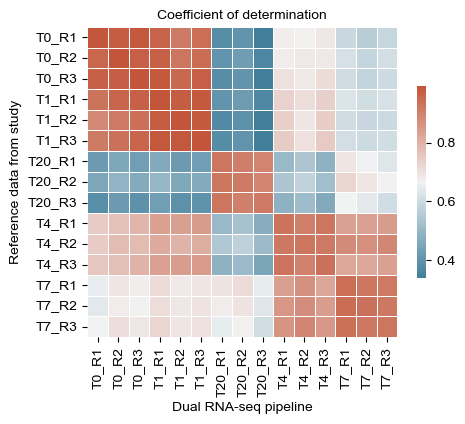

In [67]:
plotQC(dfR, 'Coefficient of determination')
plt.savefig('Wolfram-Schauerte_2022/Rsquared_Wolfram-Schauerte.svg', dpi = 600)

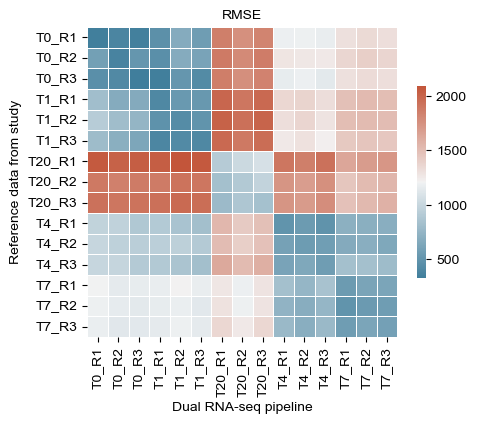

In [68]:
plotQC(dfRMSE, 'RMSE')
plt.savefig('Wolfram-Schauerte_2022/RMSE_Wolfram-Schauerte.svg', dpi = 600)

## 2 Kongari_2024 --> paired-end data

In [69]:
dfNF = pd.read_csv('Kongari_2024/countData_from_pipeline.tsv', sep='\t', comment='#', index_col=0)
dfREF = pd.read_excel('Kongari_2024/GSE253516_GEO_SUB_RNASEQ_KONGARI_Processeddata_TPM.xlsx',index_col=0)
metadata = pd.read_csv('Kongari_2024/SraRunTable.csv')

In [70]:
dfNF

,Chr,Start,End,Strand,Length,SRR27597800_sorted.bam,SRR27597785_sorted.bam,SRR27597770_sorted.bam,SRR27597810_sorted.bam,SRR27597822_sorted.bam,...,SRR27597803_sorted.bam,SRR27597820_sorted.bam,SRR27597784_sorted.bam,SRR27597782_sorted.bam,SRR27597780_sorted.bam,SRR27597787_sorted.bam,SRR27597778_sorted.bam,SRR27597777_sorted.bam,SRR27597779_sorted.bam,SRR27597788_sorted.bam
Geneid,,,,,,,,,,,,,,,,,,,,,
gene-NRS_9,CP027476.1,544,1905,+,1362,2438,11812,2302,12539,12999,...,8662,5874,14174,11710,8419,14149,8555,8085,8067,13901
gene-NRS_10,CP027476.1,2183,3316,+,1134,3211,13922,2972,14176,15604,...,10798,6729,17220,13092,10792,14935,9299,8567,8907,16122
gene-NRS_11,CP027476.1,3697,3942,+,246,902,4378,1079,3968,4534,...,3086,1705,4744,3055,2727,3765,2205,1874,1705,3637
gene-NRS_12,CP027476.1,3939,5051,+,1113,3496,18333,3856,16699,18275,...,12668,7031,20349,15064,11588,20326,11029,10114,9635,19581
gene-NRS_13,CP027476.1,5061,6995,+,1935,4665,39911,7252,26314,34068,...,20311,11974,37759,31160,23109,41805,22892,21251,20536,41540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gene-CPT_phageK_gp037,NC_005880.2,146607,146843,+,237,3022,5812,3465,12769,2998,...,10693,12291,20726,20307,22650,5622,26671,23704,24789,4919
gene-CPT_phageK_gp036,NC_005880.2,146923,147393,+,471,1994,7134,5505,7110,1343,...,5768,14071,30068,32697,38959,8175,48089,42791,46577,7597
gene-CPT_phageK_gp035,NC_005880.2,147452,147625,+,174,1145,3184,2164,3378,490,...,2797,8446,13518,15392,18155,3223,23209,20367,21182,2987


In [71]:
dfREF

,WT_0_A,WT_0_B,WT_0_C,WT_0_D,WT_2_A,WT_2_B,WT_2_C,WT_2_D,WT_5_A,WT_5_B,...,MR206_20_C,MR206_20_D,MR206_30_A,MR206_30_B,MR206_30_C,MR206_30_D,MR206_40_A,MR206_40_B,MR206_40_C,MR206_40_D
Gene name,,,,,,,,,,,,,,,,,,,,,
CPT_phageK_gp001,2408.240,2507.100,2868.620,3623.880,7199.520,6043.33,6341.68,6211.35,6918.450,6346.530,...,1704.640,1576.920,1640.250,1920.940,1851.500,1931.590,1501.840,1448.230,1689.570,1541.560
CPT_phageK_gp002,898.915,794.864,1657.630,1543.400,2486.920,2799.96,3858.60,3594.27,2792.280,2727.000,...,562.506,669.619,677.088,699.168,949.799,1043.500,640.074,609.040,618.678,641.340
CPT_phageK_gp003,1141.140,2097.350,1290.600,1545.850,3978.800,3184.83,3051.97,2805.41,3087.580,3200.800,...,1949.280,1418.690,736.239,800.481,813.165,896.562,618.472,522.660,915.054,814.503
CPT_phageK_gp004,1490.200,1440.260,1684.870,1898.740,3487.330,3994.48,3469.43,4240.44,3980.460,4287.490,...,1484.630,1185.840,829.819,847.596,824.673,886.704,719.617,717.921,967.689,882.171
CPT_phageK_gp005,710.199,1099.770,593.191,841.406,2386.740,2662.46,2520.08,3342.56,2581.750,2412.060,...,1590.900,1222.010,718.219,646.188,777.679,802.195,582.404,616.582,798.329,741.750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CPT_phageK_gp233,841.370,902.075,601.407,775.243,1723.120,1477.52,1703.32,1716.93,3014.860,2431.470,...,1737.190,2745.930,2408.550,2576.480,2183.320,1991.310,3060.620,2442.980,2491.850,2857.340
CPT_phageK_gt001,9970.930,10456.000,7908.460,8406.260,13463.700,15597.90,17460.00,15108.50,15962.300,16179.400,...,77528.300,68624.600,53406.600,55261.400,36992.100,38675.900,48357.600,55785.300,49614.000,48872.300
CPT_phageK_gt002,3696.120,685.641,1871.830,1554.580,826.051,1017.51,1656.96,1358.97,600.410,646.105,...,1667.790,2472.960,2510.320,2188.410,2221.710,1941.140,2820.690,3895.380,2324.630,2650.910


In [72]:
dfNF.index = [x.removeprefix('gene-') for x in dfNF.index.tolist()]
dfNF = dfNF.loc[dfREF.index.tolist(),]
dfNF

,Chr,Start,End,Strand,Length,SRR27597800_sorted.bam,SRR27597785_sorted.bam,SRR27597770_sorted.bam,SRR27597810_sorted.bam,SRR27597822_sorted.bam,...,SRR27597803_sorted.bam,SRR27597820_sorted.bam,SRR27597784_sorted.bam,SRR27597782_sorted.bam,SRR27597780_sorted.bam,SRR27597787_sorted.bam,SRR27597778_sorted.bam,SRR27597777_sorted.bam,SRR27597779_sorted.bam,SRR27597788_sorted.bam
CPT_phageK_gp001,NC_005880.2,486,785,+,300,4783,367,4055,5566,211,...,21253,6561,3703,3836,16648,492,23437,25180,20476,250
CPT_phageK_gp002,NC_005880.2,801,986,+,186,3281,217,2421,4264,135,...,12128,4767,2563,2224,10544,275,14357,15227,13720,130
CPT_phageK_gp003,NC_005880.2,1093,1380,+,288,2492,284,7902,4400,109,...,11290,5208,3496,3394,14675,390,20590,22579,19629,205
CPT_phageK_gp004,NC_005880.2,1380,1706,+,327,4374,367,8207,5826,164,...,20412,6806,4390,4661,20984,503,28568,31223,26193,238
CPT_phageK_gp005,NC_005880.2,1722,2015,+,294,2604,250,5886,3515,98,...,11901,5169,3362,3558,16056,358,20722,22917,19242,164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CPT_phageK_gp233,NC_005880.2,14580,15128,-,549,6447,125,13418,2281,89,...,19186,24024,1513,1378,9336,356,12108,13382,12057,110
CPT_phageK_gt001,NC_005880.2,14229,14300,-,72,8319,180,31489,2039,166,...,17285,35505,942,1056,3619,521,6202,7320,5143,81
CPT_phageK_gt002,NC_005880.2,37448,37519,-,72,827,67,2408,475,171,...,3735,4654,239,274,698,381,1105,1449,994,45
CPT_phageK_gt003,NC_005880.2,37526,37598,-,73,1904,75,4303,604,169,...,5849,6274,282,333,954,439,1388,1797,1225,50


In [73]:
lengths = dfNF['Length']
dfNF.drop([ 'Chr', 'Start', 'End', 'Strand', 'Length'], axis=1, inplace=True)
acc_drop = metadata[metadata["genotype"] == "rpoC G17D"]["Run"].tolist()
acc_drop = [acc + "_sorted.bam" for acc in acc_drop]
dfNF.drop(columns=acc_drop, inplace=True, axis=1)
dfNF

,SRR27597800_sorted.bam,SRR27597810_sorted.bam,SRR27597822_sorted.bam,SRR27597792_sorted.bam,SRR27597794_sorted.bam,SRR27597801_sorted.bam,SRR27597806_sorted.bam,SRR27597799_sorted.bam,SRR27597813_sorted.bam,SRR27597802_sorted.bam,...,SRR27597805_sorted.bam,SRR27597797_sorted.bam,SRR27597795_sorted.bam,SRR27597796_sorted.bam,SRR27597793_sorted.bam,SRR27597814_sorted.bam,SRR27597811_sorted.bam,SRR27597808_sorted.bam,SRR27597798_sorted.bam,SRR27597803_sorted.bam
CPT_phageK_gp001,4783,5566,211,1513,2131,12707,23223,6901,388,20216,...,18139,7352,2342,2277,2150,386,4415,30111,6318,21253
CPT_phageK_gp002,3281,4264,135,924,1426,7500,16650,4439,251,13123,...,11502,4553,1530,1337,1358,231,2760,19041,3725,12128
CPT_phageK_gp003,2492,4400,109,916,1506,6697,28190,3904,265,10972,...,12730,3706,1387,1177,1217,182,3051,19553,3102,11290
CPT_phageK_gp004,4374,5826,164,1442,2122,11757,32670,5856,353,17896,...,23106,6171,2093,3342,1978,287,5060,30995,5204,20412
CPT_phageK_gp005,2604,3515,98,951,1139,7077,20341,4733,194,11368,...,13314,4070,2928,1228,1314,172,3107,19086,3492,11901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CPT_phageK_gp233,6447,2281,89,1714,2960,10553,22412,10198,122,16487,...,10360,7180,2717,2073,2436,101,1541,15256,5233,19186
CPT_phageK_gt001,8319,2039,166,5209,5661,9800,5445,9615,230,13790,...,9839,11965,6138,6885,5844,256,2056,12162,9360,17285
CPT_phageK_gt002,827,475,171,452,181,2385,556,1248,126,3248,...,912,1287,440,443,482,142,341,1136,877,3735
CPT_phageK_gt003,1904,604,169,917,482,3545,643,3451,117,5058,...,1127,3291,1092,955,1060,148,417,1438,2838,5849


In [74]:
metadata = metadata.loc[metadata['genotype'] == 'WT',]
metadata.head()

,Run,Assay Type,AvgSpotLen,Bases,BioProject,BioSample,Bytes,cell_line,cell_type,Center Name,...,Organism,Platform,ReleaseDate,create_date,version,Sample Name,source_name,SRA Study,time_point,treatment
22,SRR27597789,RNA-Seq,202,5343421362,PRJNA1065939,SAMN39476148,1754044130,NRS384,bacterial cells,LABORATORY OF MUCOSAL PATHOGENS AND CELLULAR I...,...,Staphylococcus aureus,ILLUMINA,2024-10-10T00:00:00Z,2024-01-17T20:01:00Z,1,GSM8022462,NRS384,SRP484313,40 min,infected with phage K
23,SRR27597790,RNA-Seq,202,5733357314,PRJNA1065939,SAMN39476149,1900044137,NRS384,bacterial cells,LABORATORY OF MUCOSAL PATHOGENS AND CELLULAR I...,...,Staphylococcus aureus,ILLUMINA,2024-10-10T00:00:00Z,2024-01-17T20:00:00Z,1,GSM8022461,NRS384,SRP484313,40 min,infected with phage K
24,SRR27597791,RNA-Seq,202,5206661302,PRJNA1065939,SAMN39476150,1710699886,NRS384,bacterial cells,LABORATORY OF MUCOSAL PATHOGENS AND CELLULAR I...,...,Staphylococcus aureus,ILLUMINA,2024-10-10T00:00:00Z,2024-01-17T20:00:00Z,1,GSM8022460,NRS384,SRP484313,40 min,infected with phage K
25,SRR27597792,RNA-Seq,202,5699761078,PRJNA1065939,SAMN39476151,1891773540,NRS384,bacterial cells,LABORATORY OF MUCOSAL PATHOGENS AND CELLULAR I...,...,Staphylococcus aureus,ILLUMINA,2024-10-10T00:00:00Z,2024-01-17T20:00:00Z,1,GSM8022459,NRS384,SRP484313,40 min,infected with phage K
26,SRR27597793,RNA-Seq,202,5283060126,PRJNA1065939,SAMN39476152,1750753120,NRS384,bacterial cells,LABORATORY OF MUCOSAL PATHOGENS AND CELLULAR I...,...,Staphylococcus aureus,ILLUMINA,2024-10-10T00:00:00Z,2024-01-17T20:00:00Z,1,GSM8022458,NRS384,SRP484313,30 min,infected with phage K


In [75]:
# Add metadata information for sample annotation

sampleDict = {'GSM8022435': 'WT_0_A',  'GSM8022436': 'WT_0_B',  'GSM8022437': 'WT_0_C', 'GSM8022438': 'WT_0_D',
              'GSM8022439': 'WT_2_A',  'GSM8022440': 'WT_2_B',  'GSM8022441': 'WT_2_C', 'GSM8022442': 'WT_2_D',
              'GSM8022443': 'WT_5_A',  'GSM8022444': 'WT_5_B',  'GSM8022445': 'WT_5_C', 'GSM8022446': 'WT_5_D',
              'GSM8022447': 'WT_10_A',  'GSM8022448': 'WT_10_B',  'GSM8022449': 'WT_10_C', 'GSM8022450': 'WT_10_D',
              'GSM8022451': 'WT_20_A',  'GSM8022452': 'WT_20_B',  'GSM8022453': 'WT_20_C', 'GSM8022454': 'WT_20_D',
              'GSM8022455': 'WT_30_A',  'GSM8022456': 'WT_30_B',  'GSM8022457': 'WT_30_C', 'GSM8022458': 'WT_30_D',
              'GSM8022459': 'WT_40_A',  'GSM8022460': 'WT_40_B',  'GSM8022461': 'WT_40_C', 'GSM8022462': 'WT_40_D'
}

def annotateData(df, sampleDict):
    dfOut = df.copy()
 
    dfOut['SampleID'] = dfOut['Run'].astype(str) + '_sorted.bam'

    dfOut.index = dfOut['Sample Name']

    dfOut['SampleNames'] = pd.Series(sampleDict)
    dfOut.index = dfOut['SampleID']

    return dfOut

metadataFull = annotateData(metadata, sampleDict)
metadataFull.head()

,Run,Assay Type,AvgSpotLen,Bases,BioProject,BioSample,Bytes,cell_line,cell_type,Center Name,...,ReleaseDate,create_date,version,Sample Name,source_name,SRA Study,time_point,treatment,SampleID,SampleNames
SampleID,,,,,,,,,,,,,,,,,,,,,
SRR27597789_sorted.bam,SRR27597789,RNA-Seq,202,5343421362,PRJNA1065939,SAMN39476148,1754044130,NRS384,bacterial cells,LABORATORY OF MUCOSAL PATHOGENS AND CELLULAR I...,...,2024-10-10T00:00:00Z,2024-01-17T20:01:00Z,1,GSM8022462,NRS384,SRP484313,40 min,infected with phage K,SRR27597789_sorted.bam,WT_40_D
SRR27597790_sorted.bam,SRR27597790,RNA-Seq,202,5733357314,PRJNA1065939,SAMN39476149,1900044137,NRS384,bacterial cells,LABORATORY OF MUCOSAL PATHOGENS AND CELLULAR I...,...,2024-10-10T00:00:00Z,2024-01-17T20:00:00Z,1,GSM8022461,NRS384,SRP484313,40 min,infected with phage K,SRR27597790_sorted.bam,WT_40_C
SRR27597791_sorted.bam,SRR27597791,RNA-Seq,202,5206661302,PRJNA1065939,SAMN39476150,1710699886,NRS384,bacterial cells,LABORATORY OF MUCOSAL PATHOGENS AND CELLULAR I...,...,2024-10-10T00:00:00Z,2024-01-17T20:00:00Z,1,GSM8022460,NRS384,SRP484313,40 min,infected with phage K,SRR27597791_sorted.bam,WT_40_B
SRR27597792_sorted.bam,SRR27597792,RNA-Seq,202,5699761078,PRJNA1065939,SAMN39476151,1891773540,NRS384,bacterial cells,LABORATORY OF MUCOSAL PATHOGENS AND CELLULAR I...,...,2024-10-10T00:00:00Z,2024-01-17T20:00:00Z,1,GSM8022459,NRS384,SRP484313,40 min,infected with phage K,SRR27597792_sorted.bam,WT_40_A
SRR27597793_sorted.bam,SRR27597793,RNA-Seq,202,5283060126,PRJNA1065939,SAMN39476152,1750753120,NRS384,bacterial cells,LABORATORY OF MUCOSAL PATHOGENS AND CELLULAR I...,...,2024-10-10T00:00:00Z,2024-01-17T20:00:00Z,1,GSM8022458,NRS384,SRP484313,30 min,infected with phage K,SRR27597793_sorted.bam,WT_30_D


In [76]:
def changeColnames(df, meta):
    newCols = meta.loc[df.columns]['SampleNames']
    df.columns = newCols
    df = df.reindex(sorted(df.columns), axis =1)

    return df

dfNF_new = changeColnames(dfNF, metadataFull)
dfNF_new.head()

SampleNames,WT_0_A,WT_0_B,WT_0_C,WT_0_D,WT_10_A,WT_10_B,WT_10_C,WT_10_D,WT_20_A,WT_20_B,...,WT_30_C,WT_30_D,WT_40_A,WT_40_B,WT_40_C,WT_40_D,WT_5_A,WT_5_B,WT_5_C,WT_5_D
CPT_phageK_gp001,211,243,386,388,24053,21253,20216,12707,4783,6901,...,2131,2150,1513,1361,1479,1584,30111,16215,23223,18139
CPT_phageK_gp002,135,139,231,251,15765,12128,13123,7500,3281,4439,...,1426,1358,924,855,919,927,19041,10591,16650,11502
CPT_phageK_gp003,109,174,182,265,12793,11290,10972,6697,2492,3904,...,1506,1217,916,741,1035,1065,19553,11063,28190,12730
CPT_phageK_gp004,164,264,287,353,19832,20412,17896,11757,4374,5856,...,2122,1978,1442,1270,1498,1622,30995,18709,32670,23106
CPT_phageK_gp005,98,158,172,194,12222,11901,11368,7077,2604,4733,...,1139,1314,951,833,991,1193,19086,10986,20341,13314


After formatting NF output to desired format, the TPM data from GEO needs to be formatted. For this, only matching WT columns will be selected and renamed according to our notation. Further, it seems the TPM normalization has been performed for phage genes only. We will try to compensate for this normalizing by TPM after subsetting to phage genes only.

In [77]:
dfREF.drop([x for x in dfREF.columns.tolist() if 'MR206' in x], axis=1, inplace=True)
dfREF = dfREF[dfNF_new.columns.tolist()]
dfREF.head()

,WT_0_A,WT_0_B,WT_0_C,WT_0_D,WT_10_A,WT_10_B,WT_10_C,WT_10_D,WT_20_A,WT_20_B,...,WT_30_C,WT_30_D,WT_40_A,WT_40_B,WT_40_C,WT_40_D,WT_5_A,WT_5_B,WT_5_C,WT_5_D
Gene name,,,,,,,,,,,,,,,,,,,,,
CPT_phageK_gp001,2408.240,2507.100,2868.620,3623.880,4343.06,3749.03,3821.75,3304.10,1063.480,1678.240,...,383.777,521.397,230.274,338.395,281.1260,443.494,6918.45,6346.53,5547.37,5894.58
CPT_phageK_gp002,898.915,794.864,1657.630,1543.400,1750.75,1606.94,1798.73,1553.06,675.702,1005.320,...,265.201,245.291,144.918,222.537,95.2042,146.850,2792.28,2727.00,2256.16,2810.88
CPT_phageK_gp003,1141.140,2097.350,1290.600,1545.850,1626.80,1536.13,1550.51,1316.33,390.718,728.598,...,349.588,237.379,131.116,148.479,141.3720,159.126,3087.58,3200.80,5554.47,3658.81
CPT_phageK_gp004,1490.200,1440.260,1684.870,1898.740,2153.93,2379.68,2209.13,1987.63,596.069,758.404,...,304.040,272.065,137.147,201.176,147.6990,191.936,3980.46,4287.49,3238.80,4737.02
CPT_phageK_gp005,710.199,1099.770,593.191,841.406,1258.92,1315.99,1402.18,1185.85,376.278,768.120,...,167.888,215.801,255.054,161.214,112.5390,170.925,2581.75,2412.06,2255.81,2279.11


In [81]:
int(lengths['CPT_phageK_gp001'])

300

In [84]:
# TPM normalization

def TPM(df, lengths, pse):
    """
    df: rRNA depleted input table
    lengths: pd.Series genes as index
    pse: pseudocount
    """
    
    lengths = lengths[df.index.tolist()]
    tpmData = df.copy()

    for i in range(0,tpmData.shape[1]):
        rpk = (tpmData.iloc[:,i]+pse)/lengths
        scalingfactor = np.sum(rpk)/1000000
        tpm = rpk/scalingfactor

        tpmData.iloc[:,i] = tpm
    
    return tpmData

df_TPM = TPM(dfNF_new, lengths, 1)
df_TPM

SampleNames,WT_0_A,WT_0_B,WT_0_C,WT_0_D,WT_10_A,WT_10_B,WT_10_C,WT_10_D,WT_20_A,WT_20_B,...,WT_30_C,WT_30_D,WT_40_A,WT_40_B,WT_40_C,WT_40_D,WT_5_A,WT_5_B,WT_5_C,WT_5_D
CPT_phageK_gp001,2143.309988,2247.243173,2630.844669,2693.005005,3246.599653,3066.297431,3020.413915,2775.720896,884.179307,988.795255,...,380.133157,341.096714,225.910643,234.791970,208.126296,253.886206,5545.852613,4879.145246,4306.882616,4900.370413
CPT_phageK_gp002,2217.667060,2079.680356,2543.785793,2813.820637,3432.189544,2822.324264,3162.454483,2642.567349,978.354085,1025.941740,...,410.374943,347.588094,222.618299,238.006165,208.670654,239.754146,5656.523465,5140.274286,4980.519488,5011.999934
CPT_phageK_gp003,1158.432089,1678.908621,1295.877946,1918.218004,1798.773764,1696.816104,1707.669797,1523.956248,479.954669,582.748580,...,279.892055,201.193145,142.530864,133.241282,151.758758,177.867176,3751.397629,3467.695422,5445.844808,3582.472880
CPT_phageK_gp004,1530.405695,2239.131602,1796.181553,2248.352095,2455.858528,2701.804624,2453.033569,2356.164165,741.823753,769.803967,...,347.273823,287.909782,197.537999,201.013481,193.392833,238.507401,5237.305118,5164.726171,5558.555447,5726.756174
CPT_phageK_gp005,1021.311556,1494.277620,1200.063618,1377.514233,1683.422654,1752.134629,1733.189072,1577.549776,491.281972,692.043823,...,207.408871,212.782938,144.951158,146.705402,142.347825,195.158778,3587.073864,3373.285192,3849.404828,3670.343589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CPT_phageK_gp233,497.210792,538.508957,378.907607,465.309137,1407.241752,1512.619131,1346.066885,1259.692631,651.213079,798.431974,...,288.493392,211.174544,139.837564,122.555368,160.912887,200.006888,1535.489243,1345.102296,2271.302160,1529.474393
CPT_phageK_gt001,7034.842138,7444.760512,7279.576657,6663.283592,8351.349194,10390.988637,8584.880772,8919.853800,6407.096427,5740.036203,...,4206.367134,3861.983363,3239.196524,3068.500043,3346.309902,2898.600926,9333.793466,9670.933653,4208.161587,11075.809644
CPT_phageK_gt002,7245.466154,3261.879606,4050.503743,3663.363706,1646.087481,2245.790440,2022.498559,2171.489763,637.629308,745.560027,...,135.209964,319.133955,281.642231,260.736310,208.595049,186.877333,872.525131,1113.273151,430.397724,1027.664045
CPT_phageK_gt003,7063.117690,3974.183694,4162.640498,3357.128471,2527.106479,3468.389507,3106.081345,3182.993227,1446.913438,2032.359820,...,353.911013,691.434274,562.926757,763.700873,369.865317,366.659911,1089.150538,1292.155249,490.806465,1252.273299


In [85]:
dfR = Rscoring(dfREF, df_TPM)
dfRMSE = RMSEscoring(dfREF, df_TPM)

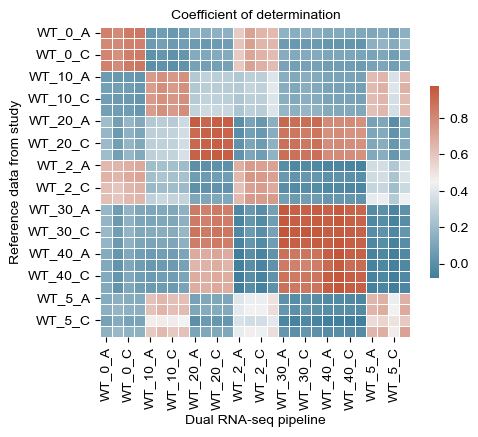

In [86]:
plotQC(dfR, 'Coefficient of determination')
plt.savefig('Kongari_2024/Rsquared_Kongari_WT.svg', dpi = 600)

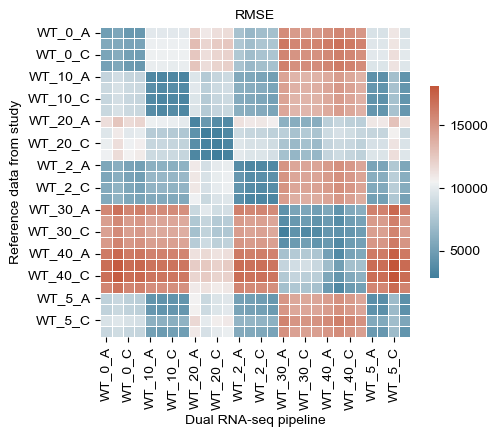

In [87]:
plotQC(dfRMSE, 'RMSE')
plt.savefig('Kongari_2024/RMSE_Kongari_WT.svg', dpi = 600)